In [1]:
!pip install firebase_admin

In [2]:
import firebase_admin

In [3]:
# Fill in student ID and name
# 
student_id = "S224314601"
student_first_last_name = "Rooi En Teong"
print(student_id, student_first_last_name)

S224314601 Rooi En Teong


In [3]:
import firebase_admin
from firebase_admin import credentials, db

# Load credentials
cred = credentials.Certificate("serviceAccountKey.json")

# Initialize Firebase app
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://sit225-w5-b55d8-default-rtdb.asia-southeast1.firebasedatabase.app/'
})


In [5]:
from firebase_admin import db
# A reference point is always needed to be set
# before any operation is carried out on a database.
# 
ref = db.reference("/")

# JSON format data (key/value pair)
data = {  # Outer {} contains inner data structure
	"Book1":
	{
		"Title": "The Fellowship of the Ring",
		"Author": "J.R.R. Tolkien",
		"Genre": "Epic fantasy",
		"Price": 100
	},
	"Book2":
	{
		"Title": "The Two Towers",
		"Author": "J.R.R. Tolkien",
		"Genre": "Epic fantasy",
		"Price": 100	
	},
	"Book3":
	{
		"Title": "The Return of the King",
		"Author": "J.R.R. Tolkien",
		"Genre": "Epic fantasy",
		"Price": 100
	},
	"Book4":
	{
		"Title": "Brida",
		"Author": "Paulo Coelho",
		"Genre": "Fiction",
		"Price": 100
	}
}

# JSON format data is set (overwritten) to the reference 
# point set at /, which is the root node.
# 
ref.set(data)

In [6]:
ref = db.reference("/")  # set ref point


'''
ref = db.reference("/"): Points to the root of your Firebase database.
ref.get(): Fetches all data stored under / (which includes Book1–Book4).
print(books): Displays the whole dictionary.
print(type(books)): Confirms that the result is a Python dict.
'''
# query all data under the ref
books = ref.get()  
print(books)
print(type(books))

# print each item separately
for key, value in books.items():
    print(f"{key}: {value}")


'''
books.items() gets each key-value pair, like "Book1": {...}
The print() shows one book at a time, nicely formatted.
'''
# Query /Book1
ref = db.reference("/Book1")
books = ref.get()
print(books)

{'Book1': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}, 'Book2': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Two Towers'}, 'Book3': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Return of the King'}, 'Book4': {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}}
<class 'dict'>
Book1: {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}
Book2: {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Two Towers'}
Book3: {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Return of the King'}
Book4: {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}
{'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}


In [7]:
# Write using push() function
# Note that a set() is called on top of push()
# 
ref = db.reference("/")
ref.set({
	"Books":
	{
		"Best_Sellers": -1
	}
})

ref = db.reference("/Books/Best_Sellers")

for key, value in data.items():
	ref.push().set(value)

In [8]:
# Update data
# 
# Requirement: The price of the books by 
# J. R. R. Tolkien is reduced to 80 units to 
# offer a discount.
# 
ref = db.reference("/Books/Best_Sellers/")
best_sellers = ref.get()
print(best_sellers)
for key, value in best_sellers.items():
	if(value["Author"] == "J.R.R. Tolkien"):
		value["Price"] = 90
		ref.child(key).update({"Price":80})

{'-OWnQi-IhBlxukJ5add3': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Fellowship of the Ring'}, '-OWnQi8MIGXif5_Xm1Ba': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Two Towers'}, '-OWnQiELBffpavmKV0Zp': {'Author': 'J.R.R. Tolkien', 'Genre': 'Epic fantasy', 'Price': 100, 'Title': 'The Return of the King'}, '-OWnQiLYRcIm-8aQNtmU': {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}}


In [9]:
# Let's delete all best seller books 
# with J.R.R. Tolkien as the author.

ref = db.reference("/Books/Best_Sellers")

for key, value in best_sellers.items():
	if(value["Author"] == "J.R.R. Tolkien"):
		ref.child(key).set({})

In [10]:
# Delete all best_seller data.
# 
ref = db.reference("/Books/Best_Sellers/")
best_sellers = ref.get()
print(best_sellers)
print(type(best_sellers))

ref = db.reference("/Books/Best_Sellers")
ref.set({})

{'-OWnQiLYRcIm-8aQNtmU': {'Author': 'Paulo Coelho', 'Genre': 'Fiction', 'Price': 100, 'Title': 'Brida'}}
<class 'dict'>


In [6]:
import random
from datetime import datetime 

ref = db.reference("/")

# JSON format data (key/value pair)
data = {  # Outer {} contains inner data structure


    ##manually pushing in some data 
  "Sensors": {
    "DHT22": {
      "202508042117": 
       {
        "Temperature": 24.5,
        "Humidity": 56.3
      },
      "202508042118": 
        {
        "Temperature": 24.6,
        "Humidity": 56.1
         }
    },
    "Accelerometer": {
      "202508042117": {
        "x": -1.2,
        "y": 0.3,
        "z": 9.8
      }
    }
}

}

# JSON format data is set (overwritten) to the reference 
# point set at /, which is the root node.
#
ref.set(data)

In [15]:
## Generating random data for DHT22 and query


ref = db.reference('/Sensors/DHT22')  
timestamp = datetime.now().strftime('%Y%m%d-%H%M%S')
reading = {
    "Temperature" : round (random.uniform(20.0,30.0),2),
    "Humidity": round (random.uniform(40.0,60.0),2)
}

ref.child(timestamp).set(reading)

data = ref.get()
print(data)

{'20250804-214026': {'Humidity': 40.48, 'Temperature': 21.09}, '20250804-214357': {'Humidity': 42.11, 'Temperature': 26.41}, '20250804-214403': {'Humidity': 52.16, 'Temperature': 26.48}, '20250804-230958': {'Humidity': 49.54, 'Temperature': 29.11}, '202508042117': {'Humidity': 56.3, 'Temperature': 24.5}, '202508042118': {'Humidity': 56.1, 'Temperature': 24.6}}


In [19]:
## Generating random data for SR04 Ultrasonic sensor and query

ref = db.reference('/Sensors/SR04 Ultrasonic')  
timestamp = datetime.now().strftime('%Y%m%d-%H%M%S')
reading = {
    "Distance" : round (random.uniform(0.0,100.0),2),
}

ref.child(timestamp).set(reading)

data = ref.get()
print(data)

{'20250804-231154': {'Distance': 26.73}, '20250804-231207': {'Distance': 12.34}, '20250804-231209': {'Distance': 15.49}, '20250804-231211': {'Distance': 83.05}}


In [22]:
import serial

# Connect to serial
ser = serial.Serial('COM9', 9600)  

ref = db.reference('/Sensors/Gyroscope')

while True:
    line = ser.readline().decode('utf-8').strip()
    try:
        x, y, z = map(float, line.split(","))
        timestamp = datetime.now().strftime('%Y%m%d-%H%M%S')

        data = {
            "x": round(x, 3),
            "y": round(y, 3),
            "z": round(z, 3),
            "timestamp": timestamp
        }

        ref.child(timestamp).set(data)
        print(f"Uploaded: {data}")

    except Exception as e:
        print(f"Failed to parse line: {line} -> {e}")

Uploaded: {'x': 0.549, 'y': -0.061, 'z': -0.488, 'timestamp': '20250804-233514'}
Uploaded: {'x': 0.183, 'y': 0.0, 'z': -0.427, 'timestamp': '20250804-233515'}
Uploaded: {'x': 0.244, 'y': 0.0, 'z': -0.427, 'timestamp': '20250804-233515'}
Uploaded: {'x': 0.183, 'y': 0.0, 'z': -0.488, 'timestamp': '20250804-233515'}
Uploaded: {'x': 0.122, 'y': 0.0, 'z': -0.427, 'timestamp': '20250804-233516'}
Uploaded: {'x': 0.183, 'y': 0.0, 'z': -0.427, 'timestamp': '20250804-233516'}
Uploaded: {'x': 0.061, 'y': 0.061, 'z': -0.427, 'timestamp': '20250804-233517'}
Uploaded: {'x': 0.061, 'y': 0.0, 'z': -0.427, 'timestamp': '20250804-233517'}
Uploaded: {'x': 0.183, 'y': 0.0, 'z': -0.427, 'timestamp': '20250804-233518'}
Uploaded: {'x': 0.244, 'y': 0.061, 'z': -0.427, 'timestamp': '20250804-233518'}
Uploaded: {'x': 0.183, 'y': 0.061, 'z': -0.488, 'timestamp': '20250804-233519'}
Uploaded: {'x': 0.183, 'y': 0.0, 'z': -0.488, 'timestamp': '20250804-233519'}
Uploaded: {'x': 0.122, 'y': 0.0, 'z': -0.427, 'timestam

SerialException: ClearCommError failed (PermissionError(13, 'The device does not recognize the command.', None, 22))

In [24]:
import csv


# Reference to gyroscope data
ref = db.reference('/Sensors/Gyroscope')
data = ref.get()

# CSV filename
filename = "gyroscope_data.csv"

# Write to CSV
with open(filename, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp", "X", "Y", "Z"])

    for timestamp, values in data.items():
        writer.writerow([
            timestamp,
            values.get("x", ""),
            values.get("y", ""),
            values.get("z", "")
        ])

print(f"Data exported to {filename}")

Data exported to gyroscope_data.csv


In [25]:
import pandas as pd

# Load raw CSV
df = pd.read_csv("gyroscope_data.csv")

# Drop rows with any missing or non-numeric x/y/z values
df_cleaned = df.dropna(subset=["X", "Y", "Z"])
df_cleaned = df_cleaned[
    df_cleaned["X"].apply(lambda x: isinstance(x, (int, float))) &
    df_cleaned["Y"].apply(lambda x: isinstance(x, (int, float))) &
    df_cleaned["Z"].apply(lambda x: isinstance(x, (int, float)))
]

# If still in string format, convert to float
df_cleaned["X"] = pd.to_numeric(df_cleaned["X"], errors="coerce")
df_cleaned["Y"] = pd.to_numeric(df_cleaned["Y"], errors="coerce")
df_cleaned["Z"] = pd.to_numeric(df_cleaned["Z"], errors="coerce")

# Drop any rows that became NaN during conversion
df_cleaned = df_cleaned.dropna()

# Save cleaned file
df_cleaned.to_csv("gyroscope_data_cleaned.csv", index=False)

print("Cleaned data saved to gyroscope_data_cleaned.csv")


Cleaned data saved to gyroscope_data_cleaned.csv


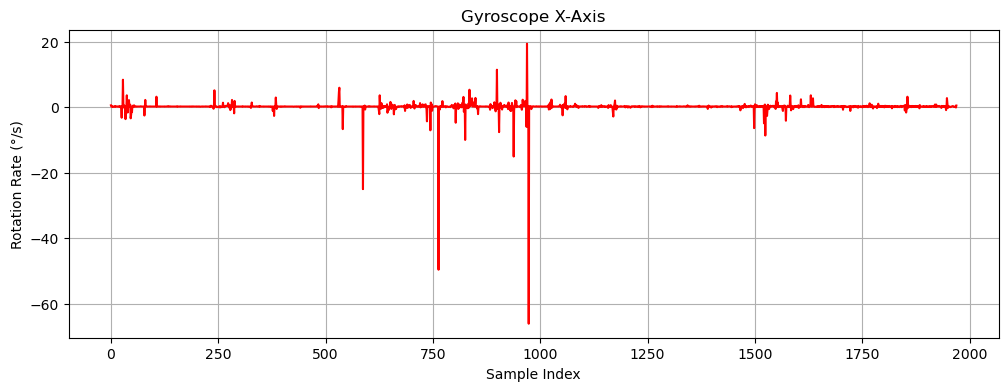

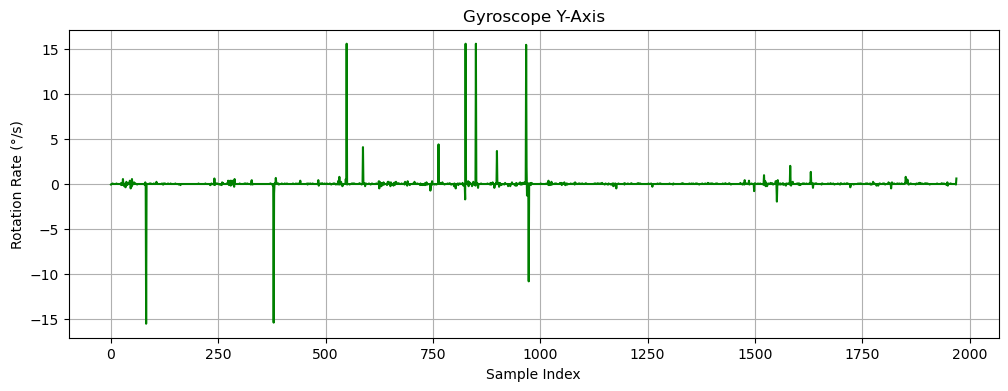

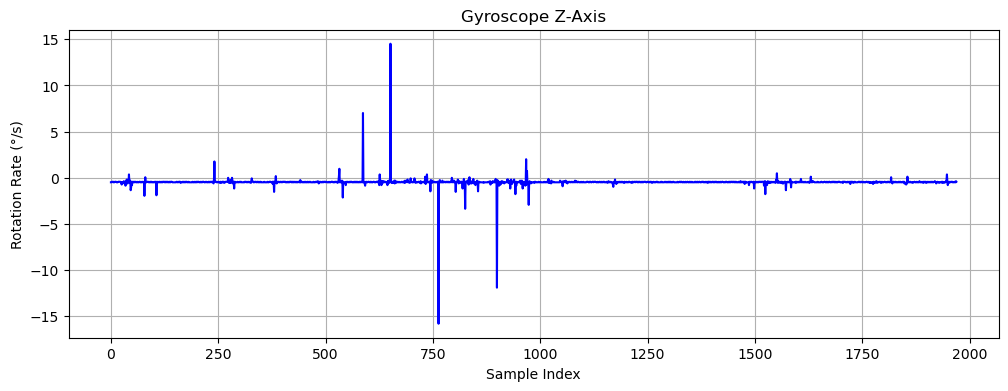

In [27]:
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("gyroscope_data_cleaned.csv")

# Optional: sort by timestamp if needed
# df = df.sort_values(by="Timestamp")

# ---- INDIVIDUAL LINE GRAPHS ----
plt.figure(figsize=(12, 4))
plt.plot(df["X"], label="X Axis", color='red')
plt.title("Gyroscope X-Axis")
plt.xlabel("Sample Index")
plt.ylabel("Rotation Rate (°/s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df["Y"], label="Y Axis", color='green')
plt.title("Gyroscope Y-Axis")
plt.xlabel("Sample Index")
plt.ylabel("Rotation Rate (°/s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df["Z"], label="Z Axis", color='blue')
plt.title("Gyroscope Z-Axis")
plt.xlabel("Sample Index")
plt.ylabel("Rotation Rate (°/s)")
plt.grid(True)
plt.show()



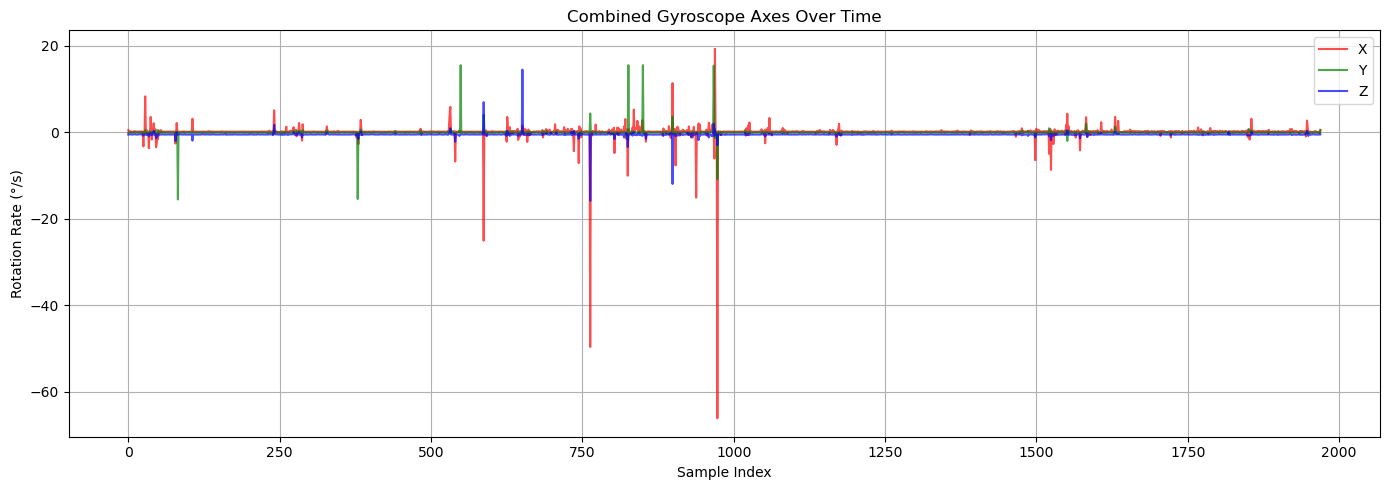

In [28]:
# ---- COMBINED LINE GRAPH ----
plt.figure(figsize=(14, 5))
plt.plot(df["X"], label="X", color='red', alpha=0.7)
plt.plot(df["Y"], label="Y", color='green', alpha=0.7)
plt.plot(df["Z"], label="Z", color='blue', alpha=0.7)
plt.title("Combined Gyroscope Axes Over Time")
plt.xlabel("Sample Index")
plt.ylabel("Rotation Rate (°/s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The gyroscope readings across X, Y, and Z axes over a period of 30 minutes reveal distinct motion patterns. The X-axis shows sharp negative spikes, suggesting sudden pitch movements — likely caused by strong keystrokes or tilting. The Y-axis has isolated positive and negative peaks around sample indices 500–1000, indicating brief lateral or side-to-side motion, possibly from varying finger pressure. The Z-axis remains mostly stable with minor short bursts, reflecting subtle rotational motion (yaw). These readings collectively indicate alternating phases of stillness and activity, confirming the presence of vibration patterns during typing. The data highlights that X and Y axes captured the most significant movement, while Z-axis motion was relatively minor.